## task 02. Линейная регрессия
## Тищенко Елизавета (ИИиНД)

In [154]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%precision %.4f

import warnings
warnings.filterwarnings('ignore') 

Загрузим датасет, содержащий информацию о стоимости медицинской страховки.
https://www.kaggle.com/datasets/mirichoi0218/insurance/

In [155]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [156]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Заметим, что в данных нет пропущенных значений.

In [157]:
df['charges'].mean()

13270.4223

Посмотрим на распределение целевого признака

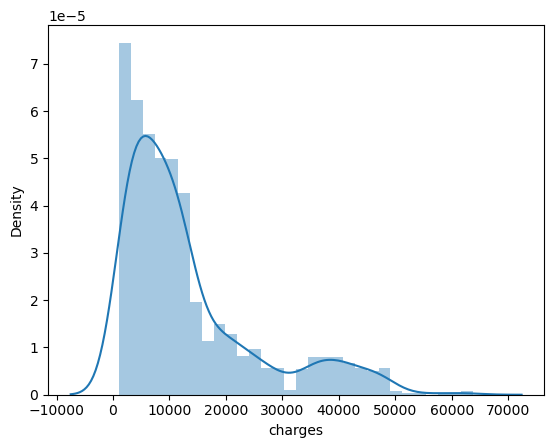

In [158]:
sns.distplot(df['charges']);

Проанализируем датасет

In [159]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Трансформируем категориальные признаки sex, smoker и region

In [160]:
df['sex'].replace(['male', 'female'], [0, 1], inplace=True)
df['smoker'].replace(['yes', 'no'], [1, 0], inplace=True)
df['region'].replace(['southeast', 'southwest', 'northwest', 'northeast'], [0, 1, 2, 3], inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


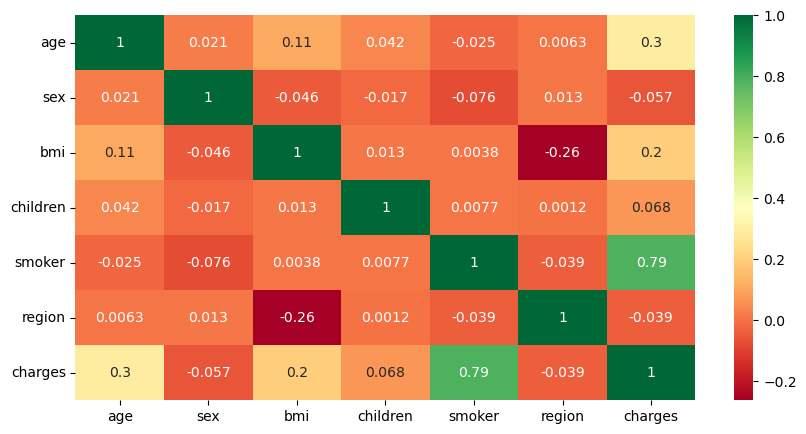

In [161]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Видим, что признаки слабо коррелируют между собой, однако признак smoker (курит человек или нет) имеет сильную корреляцию с целевым признаком.

<Axes: xlabel='age', ylabel='charges'>

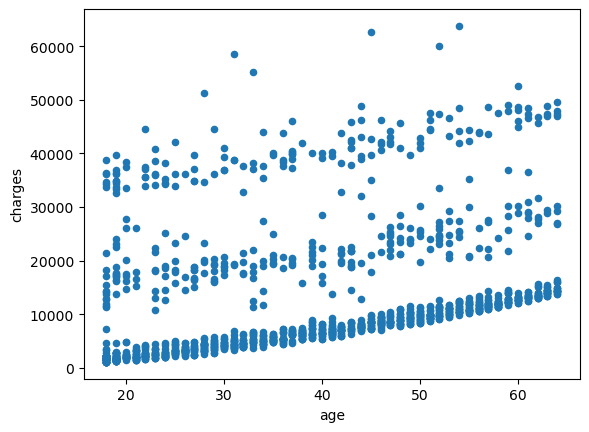

In [162]:
df.plot.scatter (x = 'age', y = 'charges')

Можно заметить, что значения charges делятся на три ценовых сегмента, причем в каждом цена линейно зависит от возраста.

Разделим выборку на обучающую и тестовую 

In [163]:
from sklearn.model_selection import train_test_split

y = df["charges"]
X = df.drop(columns=["charges"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

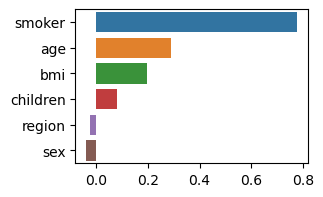

In [164]:
correlations = X_train[X.columns].corrwith(y_train).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(3, 2)

Как мы заметили ранее, прослеживается сильная корреляция признака smoker с целевым признаком 

Проведем масштабирование данных

In [165]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

X_train_scaled = scaler.fit_transform(X_train[X.columns])
X_test_scaled = scaler.transform(X_test[X.columns])

### Обучение моделей

#### Ridge модель

In [166]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = Ridge()  

model.fit(X_train[X.columns], y_train)  

y_train_pred = model.predict(X_train[X.columns])  
y_test_pred = model.predict(X_test[X.columns])  

print("Test RMSE =", mean_squared_error(y_test, y_test_pred, squared=False))
print("Train RMSE =", mean_squared_error(y_train, y_train_pred, squared=False))
print("Test MSE =", mean_squared_error(y_test, y_test_pred))
print("Train MSE =", mean_squared_error(y_train, y_train_pred))
print("Test r2_score =", r2_score(y_test, y_test_pred))
print("Train r2_score =", r2_score(y_train, y_train_pred))

Test RMSE = 5814.675408126145
Train RMSE = 6143.929543715158
Test MSE = 33810450.10186695
Train MSE = 37747870.23813594
Test r2_score = 0.7694076065049141
Train r2_score = 0.7422797547788926


#### Модель с градиентным спуском

In [205]:
class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate, self.iterations = learning_rate, iterations
    
    def fit(self, X, y):
        w = np.zeros((X.shape[1]))
        n = X.shape[0]
        for _ in range(self.iterations):
            
            #hc = np.matmul(X, w) - y
            hc = np.dot(X, w) - y
            w -= self.iterations / X.shape[1] * np.dot(X.transpose(), hc)

        self.w = w
        
    def predict(self, X):
        return np.dot(X, w)
    
    def get_params(self, deep = False):
        return {'learning_rate':self.learning_rate, "iterations": self.iterations}


In [206]:
m_train,n= X_train.shape
m_test,n= X_test.shape
xo_train = np.hstack((np.ones((m_train, 1)), X_train_scaled))
xo_test = np.hstack((np.ones((m_test, 1)), X_test_scaled))

model_GD = GradientDescentLinearRegression()
model_GD.fit(xo_train, y_train)

In [207]:
y_train_pred=model_GD.predict(xo_train)
y_test_pred = model_GD.predict(xo_test)

print("Test RMSE =", mean_squared_error(y_test, y_test_pred, squared=False))
print("Train RMSE =", mean_squared_error(y_train, y_train_pred, squared=False))
print("Test MSE =", mean_squared_error(y_test, y_test_pred))
print("Train MSE =", mean_squared_error(y_train, y_train_pred))
print("Test r2_score =", r2_score(y_test, y_test_pred))
print("Train r2_score =", r2_score(y_train, y_train_pred))


Test RMSE = 5811.422727896648
Train RMSE = 6143.617374992559
Test MSE = 33772634.122313716
Train MSE = 37744034.45031047
Test r2_score = 0.769665517216285
Train r2_score = 0.7423059432809925


Сравним качество предсказания с Ridge моделью.

Таким образом, мы применили Ridge модель и модель с использованием градиентного спуска с шагом 0.01 и 1000 итераций. Делаем вывод, что значения точности прогноза этих моделей достаточно близки. 

### Кросс-валидация

Проведем кросс-валидацию Ridge модели

In [223]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="neg_mean_squared_error")
MSE_train= np.append(-cv_scores, [np.mean(-cv_scores),np.std(-cv_scores)] )

cv_scores = cross_val_score(model, X_test_scaled, y_test, cv=5, scoring="neg_mean_squared_error")
MSE_test= np.append(-cv_scores, [np.mean(-cv_scores),np.std(-cv_scores)] )

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="neg_root_mean_squared_error")
RMSE_train= np.append(-cv_scores, [np.mean(-cv_scores),np.std(-cv_scores)] )

cv_scores = cross_val_score(model, X_test_scaled, y_test, cv=5, scoring="neg_root_mean_squared_error")
RMSE_test= np.append(-cv_scores, [np.mean(-cv_scores),np.std(-cv_scores)] )

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="r2")
R2_train= np.append(cv_scores, [np.mean(cv_scores),np.std(cv_scores)] )

cv_scores = cross_val_score(model, X_test_scaled, y_test, cv=5, scoring="r2")
R2_test= np.append(cv_scores, [np.mean(cv_scores),np.std(cv_scores)] )


In [224]:

df = pd.DataFrame({
    "MSE_train": MSE_train, "MSE_test": MSE_test, "RMSE_train":RMSE_train, "RMSE_test":RMSE_test,
    "R2_train": R2_train, "R2_test":R2_test
})
df=df.T
df.columns=["Fold1", "Fold2", "Fold3", "Fold4", "Fold5", "E", "STD"]

Проведем кросс-валидацию модели с градиентным спуском

In [225]:
cv_scores = cross_val_score(model_GD, xo_train, y_train, cv=5, scoring="neg_mean_squared_error")
MSE_train= np.append(-cv_scores, [np.mean(-cv_scores),np.std(-cv_scores)] )

cv_scores = cross_val_score(model_GD, xo_test, y_test, cv=5, scoring="neg_mean_squared_error")
MSE_test= np.append(-cv_scores, [np.mean(-cv_scores),np.std(-cv_scores)] )

cv_scores = cross_val_score(model_GD, xo_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
RMSE_train= np.append(-cv_scores, [np.mean(-cv_scores),np.std(-cv_scores)] )

cv_scores = cross_val_score(model_GD, xo_test, y_test, cv=5, scoring="neg_root_mean_squared_error")
RMSE_test= np.append(-cv_scores, [np.mean(-cv_scores),np.std(-cv_scores)] )

cv_scores = cross_val_score(model_GD, xo_train, y_train, cv=5, scoring="r2")
R2_train= np.append(cv_scores, [np.mean(cv_scores),np.std(cv_scores)] )

cv_scores = cross_val_score(model_GD, xo_test, y_test, cv=5, scoring="r2")
R2_test= np.append(cv_scores, [np.mean(cv_scores),np.std(cv_scores)] )

In [226]:
df_GD = pd.DataFrame({
    "MSE_train": MSE_train, "MSE_test": MSE_test, "RMSE_train":RMSE_train, "RMSE_test":RMSE_test,
    "R2_train": R2_train, "R2_test":R2_test
})
df_GD=df_GD.T
df_GD.columns=["Fold1", "Fold2", "Fold3", "Fold4", "Fold5", "E", "STD"]

#### Показатели для Ridge регрессии

In [227]:
df

,Fold1,Fold2,Fold3,Fold4,Fold5,E,STD
MSE_train,3.664298e+07,3.465948e+07,4.264814e+07,4.157831e+07,3.649284e+07,3.840435e+07,3.126152e+06
MSE_test,2.995436e+07,3.862530e+07,3.228846e+07,4.959989e+07,2.577996e+07,3.524960e+07,8.292263e+06
RMSE_train,6.053345e+03,5.887230e+03,6.530554e+03,6.448124e+03,6.040930e+03,6.192037e+03,2.510581e+02
RMSE_test,5.473058e+03,6.214926e+03,5.682294e+03,7.042719e+03,5.077397e+03,5.898079e+03,6.798996e+02
R2_train,7.629034e-01,8.019390e-01,6.334124e-01,6.882319e-01,7.577437e-01,7.288461e-01,6.015753e-02
R2_test,7.888360e-01,7.582811e-01,7.843983e-01,7.034010e-01,7.678155e-01,7.605464e-01,3.063586e-02


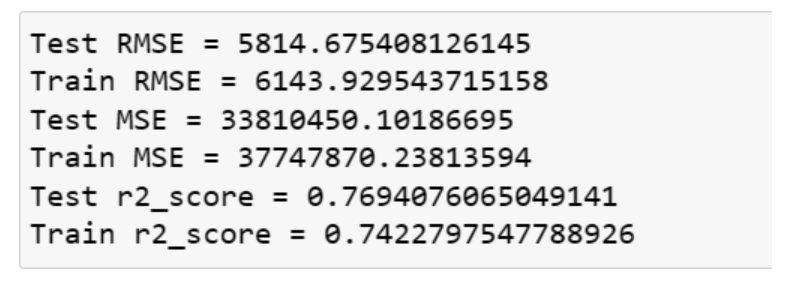

#### Показатели для модели с градиентным спуском

In [228]:
df_GD

,Fold1,Fold2,Fold3,Fold4,Fold5,E,STD
MSE_train,3.649229e+07,3.427553e+07,4.117023e+07,4.092369e+07,3.586512e+07,3.774537e+07,2.792015e+06
MSE_test,2.878682e+07,3.572387e+07,3.159318e+07,4.705563e+07,2.574160e+07,3.378022e+07,7.407440e+06
RMSE_train,6.040885e+03,5.854531e+03,6.416403e+03,6.397163e+03,5.988750e+03,6.139546e+03,2.265938e+02
RMSE_test,5.365335e+03,5.976945e+03,5.620781e+03,6.859710e+03,5.073618e+03,5.779278e+03,6.165765e+02
R2_train,7.638785e-01,8.041331e-01,6.461160e-01,6.931405e-01,7.619107e-01,7.338357e-01,5.653909e-02
R2_test,7.970666e-01,7.764384e-01,7.890409e-01,7.186153e-01,7.681610e-01,7.698644e-01,2.749651e-02


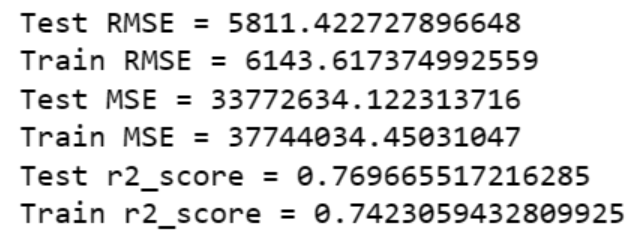